<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [2]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


[Text(0.5, 1.0, 'Boxplot dos Preços dos Diamantes')]

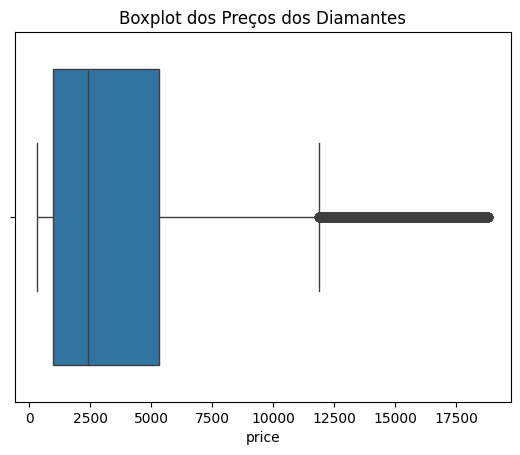

In [ ]:
# gráfico do exercício 1

diamonds = sns.boxplot(x=data['price'])
diamonds.set(title='Boxplot dos Preços dos Diamantes')


\**Insight do gráfico 1**: É possível observar que cerca de metade dos preços está na faixa entre 1.000 e 5.000. Também há valores atípicos (outliers) acima de 11.000, que provavelmente correspondem a diamantes raros. Para entender melhor esses casos, é necessário realizar uma análise mais aprofundada.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [7]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# gráfico do exercício 2

diamonds = data[['carat', 'clarity', 'price']]
diamonds.head()



,carat,clarity,price
0,0.23,SI2,326
1,0.21,SI1,326
2,0.23,VS1,327
3,0.29,VS2,334
4,0.31,SI2,335


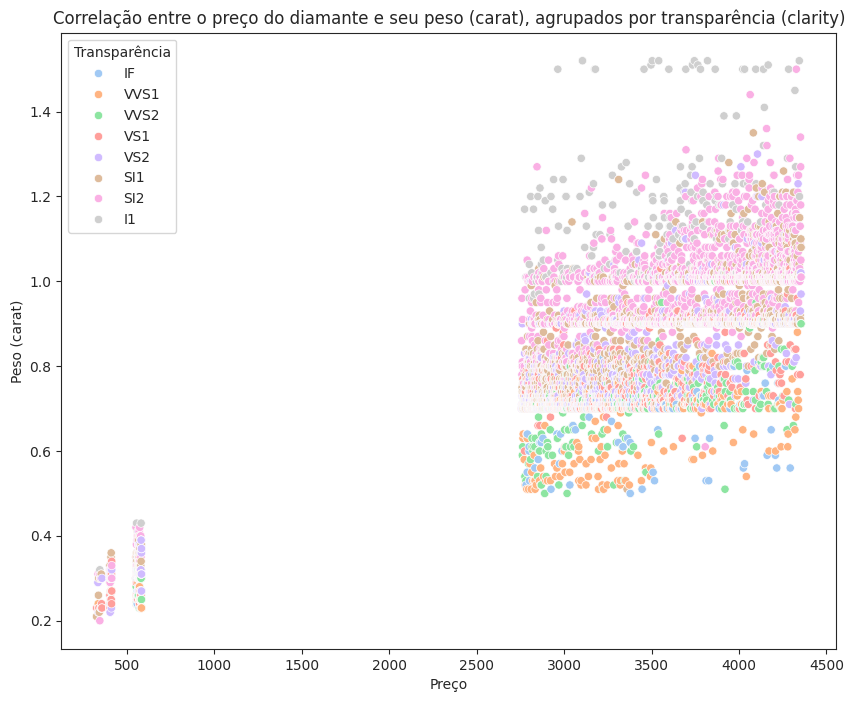

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando e filtrando os dados
data = sns.load_dataset("diamonds")
diamonds = data[['carat', 'clarity', 'price']]

# Criando o gráfico
with sns.axes_style("ticks"):
    plt.figure(figsize=(10, 8))  # Define o tamanho da figura diretamente
    grafico = sns.scatterplot(data=diamonds, x="price", y="carat", hue="clarity", palette="pastel")
    grafico.set(
        title="Correlação entre o preço do diamante e seu peso (carat), agrupados por transparência (clarity)",
        xlabel="Preço",
        ylabel="Peso (carat)"
    )
    grafico.get_legend().set_title("Transparência")



**Insight do gráfico 2**: O gráfico mostra uma correlação positiva entre o peso (carat) e o preço dos diamantes: quanto maior o peso, maior tende a ser o preço. Além disso, é possível observar que os diamantes com diferentes níveis de transparência ("clarity") estão distribuídos de forma relativamente equilibrada, embora alguns grupos (como "IF" ou "VVS1") apareçam com mais frequência em faixas de preços mais altos. Isso sugere que tanto o peso quanto a clareza têm impacto no valor de mercado dos diamantes.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [14]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


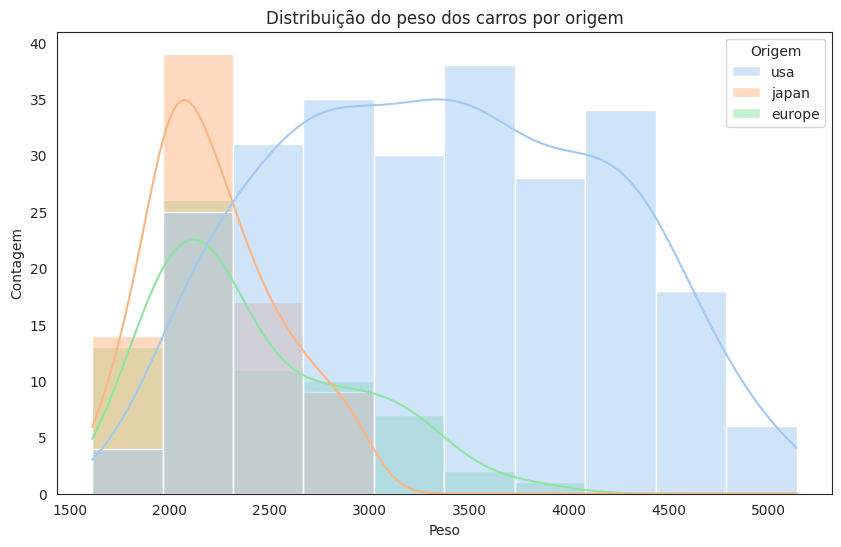

In [16]:
# gráfico do exercício 3

import seaborn as sns
import matplotlib.pyplot as plt

# Carregando os dados
data = sns.load_dataset("mpg")
cars = data[["weight", "origin"]]

# Criando o gráfico
with sns.axes_style("white"):
    plt.figure(figsize=(10, 6))  # Tamanho opcional
    grafico = sns.histplot(data=cars, x="weight", hue="origin", kde=True, palette="pastel")
    grafico.set(
        title="Distribuição do peso dos carros por origem",
        xlabel="Peso",
        ylabel="Contagem"
    )
    grafico.get_legend().set_title("Origem")


**Insight do gráfico 3**:
O gráfico mostra que os carros de origem norte-americana tendem a ter pesos maiores em comparação aos de origem europeia e japonesa. A curva de densidade reforça essa diferença, indicando que carros dos EUA possuem uma distribuição com média deslocada para a direita. Já os carros japoneses e europeus são geralmente mais leves, o que pode refletir diferenças nos padrões de design, eficiência de combustível ou regulamentações de mercado.


---